In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


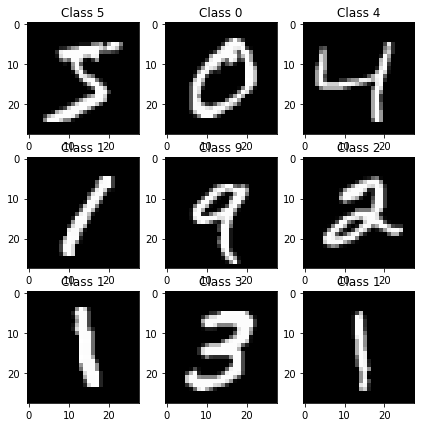

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [9]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=6,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 9s 158us/step - loss: 0.2505 - accuracy: 0.9247 - val_loss: 0.1056 - val_accuracy: 0.9692
Epoch 2/6
60000/60000 [==============================] - 9s 144us/step - loss: 0.1011 - accuracy: 0.9689 - val_loss: 0.0778 - val_accuracy: 0.9750
Epoch 3/6
60000/60000 [==============================] - 9s 155us/step - loss: 0.0690 - accuracy: 0.9786 - val_loss: 0.0728 - val_accuracy: 0.9779
Epoch 4/6
60000/60000 [==============================] - 10s 162us/step - loss: 0.0562 - accuracy: 0.9820 - val_loss: 0.0751 - val_accuracy: 0.9773
Epoch 5/6
60000/60000 [==============================] - 10s 168us/step - loss: 0.0468 - accuracy: 0.9847 - val_loss: 0.0735 - val_accuracy: 0.9793
Epoch 6/6
60000/60000 [==============================] - 11s 179us/step - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.0637 - val_accuracy: 0.9824


In [10]:
score = model.evaluate(X_test, Y_test,
                       verbose=0)
print(model.metrics_names)
#print('Test score:',score)
print('Test score:', score[0])
print('Test accuracy:', score[1])

['loss', 'accuracy']
Test score: 0.06371177363727475
Test accuracy: 0.9824000000953674


In [11]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

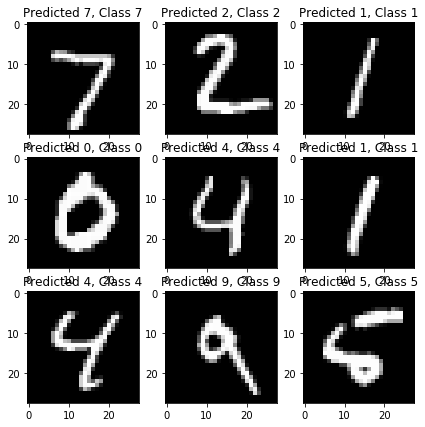

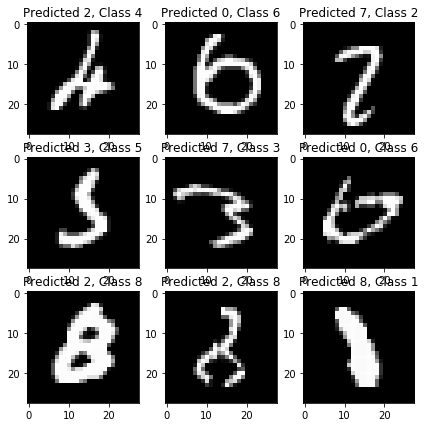

In [12]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))